# 03 머신러닝의 기초를 다집니다

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/do-it-dl/blob/master/Ch03.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/do-it-dl/blob/master/Ch03.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 03-1 선형 회귀에 대해 알아봅니다

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [4]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [5]:
diabetes.target[:3]

array([151.,  75., 141.])

In [6]:
import matplotlib.pyplot as plt

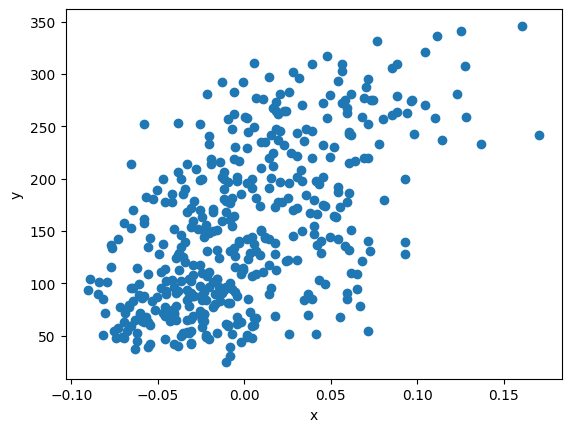

In [7]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
x = diabetes.data[:, 2]
y = diabetes.target

<퀴즈> 슬라이싱을 사용해 훈련 데이터 x에서 100번째 부터 109번째 까지 샘플을 출력해 보세요. 슬라이싱한 배열의 크기는 얼마인가요?

In [9]:
x_sample = x[99:109]
print(x_sample, x_sample.shape)

[-0.06440781  0.01750591 -0.04500719  0.02828403  0.04121778  0.06492964
 -0.03207344 -0.07626374  0.04984027  0.04552903] (10,)


## 03-2 경사 하강법에 대해 알아봅니다

In [10]:
w = 1.0
b = 1.0

In [11]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [12]:
print(y[0])

151.0


In [13]:
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
print(y_hat_inc)

1.0678658271705517


In [14]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [15]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [16]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [17]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [18]:
b_new = b + 1
print(b_new)

2.0


In [19]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [20]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [21]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


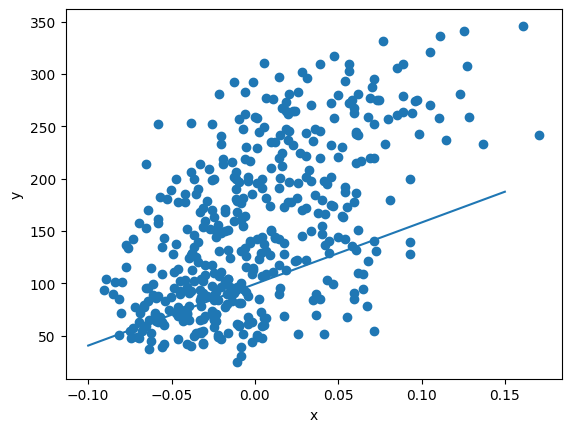

In [22]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


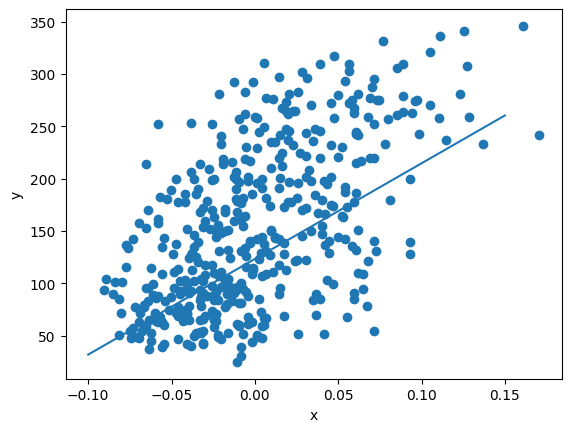

In [24]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


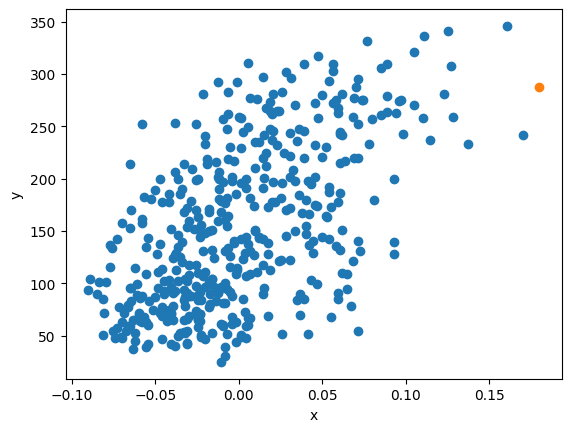

In [26]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 03-4 뉴런을 만들어봅니다

In [27]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

In [28]:
neuron = Neuron()
neuron.fit(x, y)

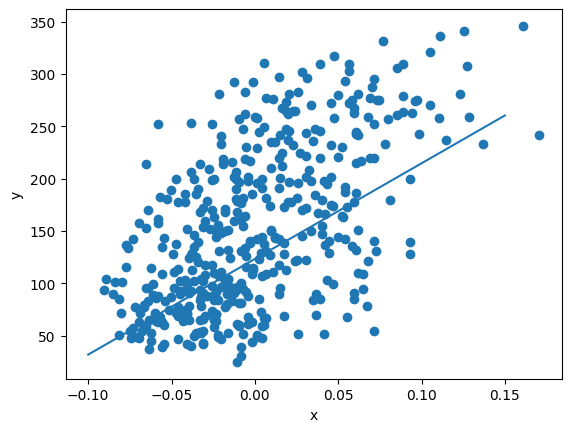

In [29]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()